# Assignment 1: Comparison of Multivariate Linear Regression Models

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
*In this assignment, you will get to pick your favorite data set on Kaggle (https://kaggle.com) and implement some learning models in a context of a **regression** problem.  For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or Chapter 4 of the textbook if you need additional sample codes to help with your assignment. To get started, you will need to determine which dataset to download and copy it into the directory where you wish to run your implementation (ie. same folder as this file).* 

*For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


***
## 1. BIG PICTURE (5 pts)
Write a paragraph explaining the context of the problem in which you are trying to investigate. In the same paragraph, explain why you pick your dataset. Then, you MUST include the URL to the dataset to help the TA to download it (we will assume that the data file is put into the same folder as the Jupyter Notebook file). Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

**ANSWER:** 
My dataset is actually quite small. It is the "Predict FIFA 2018 Man of The Match", that is about 4KB in size, as it contains a
summmary of player statistics and details from all of the countries which have a team participating in the Fédération
Internationale de Football Association. It contains 128 entries corresponding to the 128 national teams that partake in
the league, and has 27 different features that can be used to qualify a particular player to be the "Man of the Match" or a
particular team to be the "Team of a Bracket". I chose this data set because it reflects my passion for soccer, as well as provided me an opportunity to understand how commentators came to determine the "Man of the Match," what is deemed the most valuable player for a particular game. The data set provides a number of basic statistics that list off basic criteria for a given games MVP, including but not limited to the number of goals scored in a given game, successful passes made, etc.

In [2]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
# datasetURL = "https://www.kaggle.com/mathan/fifa-2018-match-statistics"; # required url to download for CSV file. The TA will download and run your program.

# setting up file and extracting data from csv

data = pd.read_csv("FIFA 2018 Statistics.csv")     # For windows
#data = pd.read_csv("FIFA-2018-Statistics.csv")    # FOr mac


---
## 2. DATA DISCOVERY, CLEANING, AND SCALING (10 pts)

**Data Discover:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

Implementation Note: You will do this for all features and your code should work with datasets of all sizes (any number of features/ examples). After learning the parameters from the model, you must first normalize the new $x$ value using the mean and standard deviation that you have previously computed from the training set.

The mean of this dataset is  [1.30392157e+00 5.01078431e+01 1.23333333e+01 3.78431373e+00
 5.17647059e+00 3.31372549e+00 4.75490196e+00 1.38235294e+00
 1.51470588e+01 2.52941176e+00 8.23431373e+01 4.66794118e+02
 1.06676471e+02 1.35490196e+01 1.71568627e+00 9.80392157e-03
 1.96078431e-02] 

The variance of this dataset is  [1.36841599e+00 9.80766052e+01 2.59281046e+01 4.65936178e+00
 6.10611303e+00 5.43098808e+00 5.57718185e+00 1.31459054e+00
 2.21842561e+01 3.71972318e+00 3.12646098e+01 2.27515360e+04
 1.42650231e+02 1.92868128e+01 1.53681276e+00 9.70780469e-03
 1.92233756e-02] 

(102, 17)
(102,)
The mean of this dataset is  [1.30392157e+00 5.01078431e+01 1.23333333e+01 3.78431373e+00
 5.17647059e+00 3.31372549e+00 4.75490196e+00 1.38235294e+00
 1.51470588e+01 2.52941176e+00 8.23431373e+01 4.66794118e+02
 1.06676471e+02 1.35490196e+01 1.71568627e+00 9.80392157e-03
 1.96078431e-02] 

The variance of this dataset is  [1.36841599e+00 9.80766052e+01 2.59281046e+01 4.65936178e+00
 6.106113

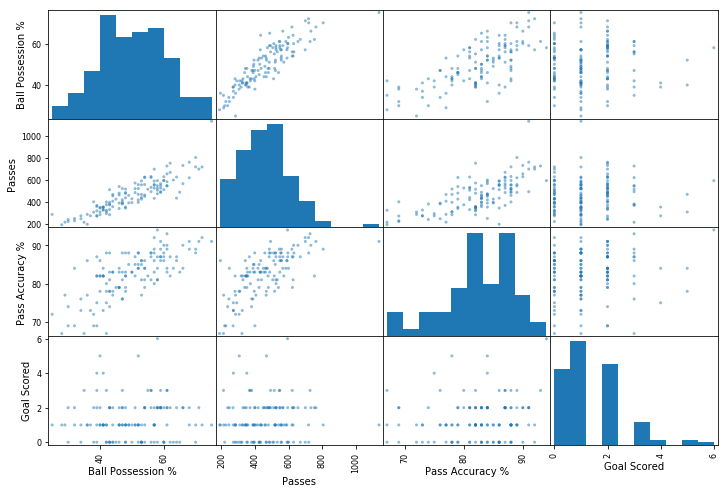

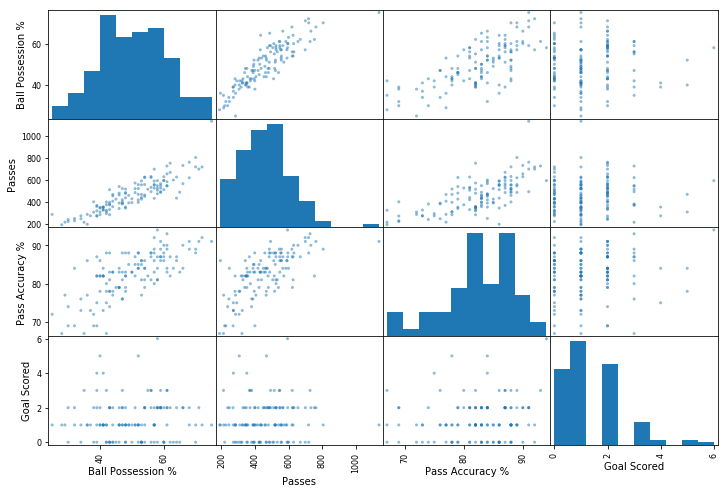

In [3]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Data Discovery
train_set, test_set = train_test_split(data, test_size= 0.2, random_state= 42)
attributes = ["Ball Possession %", "Passes", "Pass Accuracy %", "Goal Scored"]
scatter_matrix(data[attributes], figsize=(12,8))
corr_matrix = data.corr()
corr_matrix["Ball Possession %"].sort_values(ascending=False)

# Data Cleaning
# Dropping the following columns from the data set bc they were deemed irrelevant to the linear regression to be performed
cleaned_train = train_set.drop(['Date','Team', 'Opponent','1st Goal','Round', 'PSO', 'Goals in PSO', 'Own goals', 'Own goal Time', 'Man of the Match'  ], axis=1)
train_pred = train_set["Ball Possession %"].copy()
cleaned_test = test_set.drop(['Date','Team', 'Opponent','1st Goal','Round', 'PSO', 'Goals in PSO', 'Own goals', 'Own goal Time', 'Man of the Match'  ], axis=1)
test_pred = test_set["Ball Possession %"].copy()

# Feature Scaling
scaler = StandardScaler()
scaled_train = scaler.fit_transform(cleaned_train)
# mean from scaled set to scale the test set
mean = scaler.mean_
print("The mean of this dataset is ", mean ,"\n")
variance = scaler.var_
print("The variance of this dataset is ", variance ,"\n")
scaled_test = (cleaned_test - mean) / variance

# Your code goes here for this section.
X_train = scaled_train;
print(X_train.shape)
y_train = train_pred;
print(y_train.shape)
X_test = scaled_test;
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Data Discovery
train_set, test_set = train_test_split(data, test_size= 0.2, random_state= 42)
attributes = ["Ball Possession %", "Passes", "Pass Accuracy %", "Goal Scored"]
scatter_matrix(data[attributes], figsize=(12,8))
corr_matrix = data.corr()
corr_matrix["Ball Possession %"].sort_values(ascending=False)

# Data Cleaning
# Dropping the following columns from the data set bc they were deemed irrelevant to the linear regression to be performed
cleaned_train = train_set.drop(['Date','Team', 'Opponent','1st Goal','Round', 'PSO', 'Goals in PSO', 'Own goals', 'Own goal Time', 'Man of the Match'  ], axis=1)
train_pred = train_set["Ball Possession %"].copy()
cleaned_test = test_set.drop(['Date','Team', 'Opponent','1st Goal','Round', 'PSO', 'Goals in PSO', 'Own goals', 'Own goal Time', 'Man of the Match'  ], axis=1)
test_pred = test_set["Ball Possession %"].copy()

# Feature Scaling
scaler = StandardScaler()
scaled_train = scaler.fit_transform(cleaned_train)
# mean from scaled set to scale the test set
mean = scaler.mean_
print("The mean of this dataset is ", mean ,"\n")
variance = scaler.var_
print("The variance of this dataset is ", variance ,"\n")
scaled_test = ((cleaned_test - mean) / variance)

# Your code goes here for this section.
# X_train = scaled_train;
# y_train = train_pred;
# X_test = scaled_test;
# y_test = test_pred;


- - -
## 3. IMPLEMENTATION OF GRADIENT DESCENT (45 pts)
The gradient descent formulation remain the same as one in the lecture. You should write code to implement the **MyLinearRegression** class and its predefined methods:

* **Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code supports any number of features and is well-vectorized.

In [70]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation

class MyLinearRegression:
    def __init__ (self):
        self.theta = 0;
        self.alpha = 0.01;
        self.cost  = 0;
        self.costList = []; #param added in for easier graphing
  
    def fitUsingGradientDescent(self, X_train, y_train):
        # implementation code here
        m, n = X_train.shape
        X_train = np.c_[np.ones((m,1)), X_train]
        theta = np.zeros([n+1])
        iters = 18
        theta = self.gradientDescent(X_train, y_train, theta, self.alpha, iters)
        self.theta = theta
    
    def gradientDescent(self, X_train, y_train, theta, alpha, iters):
        # implementation code here
        self.theta = 0
        self.cost = 0
        m, n = X_train.shape
        for i in range(iters):
            theta = theta - alpha * (2/m * X_train.T.dot(X_train.dot(theta) - y_train))
            cost = self.computeCostFunc(X_train, y_train, theta)
            self.costList.append(cost)
        return theta

    
    def computeCostFunc(self, X_train, y_train, theta): 
        # compute the cost function 
        self.theta = 0
        m, n = X_train.shape
        cost = (1/m) * (X_train.dot(theta) - y_train).T.dot(X_train.dot(theta) - y_train)
        return cost
    
    def predict(self, X_test):
        # implementation code here 
        m, n=X_test.shape
        X_test=np.c_[np.ones((m, 1)), X_test]
        y_predict=X_test.dot(self.theta)
        return y_predict
    
    def fitUsingNormalEquation(self, X_train, y_train):
        X_b = np.c_[np.ones((X_train.shape[0],1)), X_train]
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myNormalEquation = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)  
myNormalEquation.fitUsingNormalEquation(X_train, y_train)

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

**ANSWER** : From all the learning rates used, alpha = 0.1 converges the fastest at a small value

0


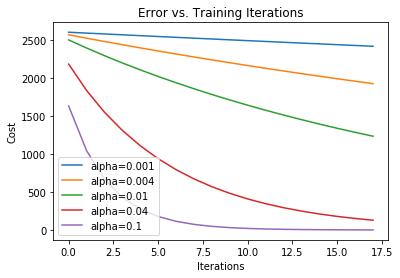

In [67]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.

iter = 18

myGradientDescentModel1 = MyLinearRegression()
myGradientDescentModel1.alpha= 0.001
myGradientDescentModel1.fitUsingGradientDescent(X_train, y_train)
print(myGradientDescentModel1.cost)

myGradientDescentModel2 = MyLinearRegression()
myGradientDescentModel2.alpha= 0.004
myGradientDescentModel2.fitUsingGradientDescent(X_train, y_train)

myGradientDescentModel3 = MyLinearRegression()
myGradientDescentModel3.alpha= 0.01
myGradientDescentModel3.fitUsingGradientDescent(X_train, y_train)

myGradientDescentModel4 = MyLinearRegression()
myGradientDescentModel4.alpha= 0.04
myGradientDescentModel4.fitUsingGradientDescent(X_train, y_train)

myGradientDescentModel5 = MyLinearRegression()
myGradientDescentModel5.alpha= 0.1
myGradientDescentModel5.fitUsingGradientDescent(X_train, y_train)

plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  
plt.plot(range(iter),myGradientDescentModel1.costList,label= 'alpha=0.001')
plt.plot(range(iter),myGradientDescentModel2.costList,label= 'alpha=0.004')
plt.plot(range(iter),myGradientDescentModel3.costList,label= 'alpha=0.01')
plt.plot(range(iter),myGradientDescentModel4.costList,label= 'alpha=0.04')
plt.plot(range(iter),myGradientDescentModel5.costList,label= 'alpha=0.1')
plt.legend()

- - -
## 4. IMPLEMENTATION OF THE NORMAL EQUATION (10 pts)

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [68]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myGradientDescentModel = MyLinearRegression()

myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)

- - -

## 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS (20 pts)

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you may also use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the Root Mean Squared Error (RMSE) as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:


**ANSWER:** Based on the results produced, it appears the Gradient Descent has the worst performance. The RMSE provided shows that there is roughly 10% error for the Normal Equation model, which falls within a 90% train accuracy (not the best, but not terrible). A way that this could have been remediated is by using a larger data set, thus having a better training set. 

In [71]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict_sgd = mySGDModel.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_predict_sgd)
mySGDModel_rmse = np.sqrt(mse_sgd)
print("RMSE for SGD Regressor:", mySGDModel_rmse)

# myNormalEquationModel_rmse = ?
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train,y_train)
y_predict_nem = myNormalEquationModel.predict(X_test)
mse_nem = mean_squared_error(y_test, y_predict_nem)
myNormalEquationModel_rmse = np.sqrt(mse_nem)
print("RMSE for Normal Equation", myNormalEquationModel_rmse)

# myGradientDescentModel_rmse = ?
y_predict_gdm = myGradientDescentModel.predict(X_test)
mse_gdm = mean_squared_error(y_test, y_predict_gdm)
myGradientDescentModel_rmse = np.sqrt(mse_gdm)
print("RMSE for Gradient Descent", myGradientDescentModel_rmse)

RMSE for SGD Regressor: 15.85609074854311
RMSE for Normal Equation 10.94120868361643
RMSE for Gradient Descent 36.188155609850995


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


- - -
## 6. PRESENTATION OF YOUR SOLUTION (10 pts)

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

**ANSWER:** My approach provides a simple optimization for the way a learning model is trained and tested by a particular data set, in this case: finding the MVP for a given soccer game. This project was designed to test my understanding of data analysis techniques (like linear regression) and how (simple) software libraries are implemented. Additionally, it provided the opportunity to synthesize that knowledge into a working solution that could be compared to existing resources. Improvements to my design would be to implement a functionality that correctly handles categorical features; the data set that I selected was predominantly numerical values, and any categorical data (Team Name, Round, etc.) was removed due to its negligible impact on the analysis. This would allow for a robust solution that handles more complex data sets. Additionally, on the next iteration of this project, I would choose a larger data set in order to observe how size impacts performance and accuracy.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 1:...".

Best of luck and have fun!